In [3]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

using default groups
Standard deviation of label Pontine crossing tract (a part of MCP): 9.75764366183e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 9.73600866531e-05
Region: Pontine crossing tract (a part of MCP)
0.186766414333
0.836768713434
0.0378728112538
Standard deviation of label Genu of corpus callosum: 6.18840846631e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 5.99195500722e-05
Region: Genu of corpus callosum
0.432377468323
0.856224298132
0.229200172004
Standard deviation of label Body of corpus callosum: 5.64446943006e-05
Model used for correction: roi ~ 1 + gender + educyears
Standard deviation after correction for covariates: 5.48076511467e-05
Region: Body of corpus callosum
0.909749593772
0.761471623758
0.826416058784
Standard deviation of label Splenium of corpus callosum: 5.54382082509e-05
Model used for correction: roi ~ 1 + gender + educy

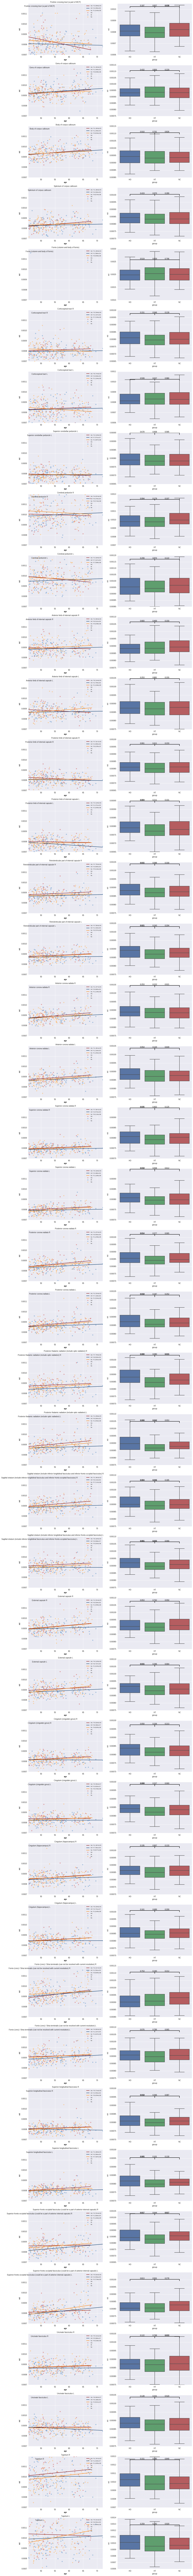

In [5]:
regions = range(2, 49)
for x in [9,10,11,12,13]:
    regions.remove(x)
names = {1: 'Middle cerebellar peduncle',
 2: 'Pontine crossing tract (a part of MCP)',
 3: 'Genu of corpus callosum',
 4: 'Body of corpus callosum',
 5: 'Splenium of corpus callosum',
 6: 'Fornix (column and body of fornix)',
 7: 'Corticospinal tract R',
 8: 'Corticospinal tract L',
 9: 'Medial lemniscus R',
 10: 'Medial lemniscus L',
 11: 'Inferior cerebellar peduncle R  ',
 12: 'Inferior cerebellar peduncle L',
 13: 'Superior cerebellar peduncle R',
 14: 'Superior cerebellar peduncle L',
 15: 'Cerebral peduncle R',
 16: 'Cerebral peduncle L',
 17: 'Anterior limb of internal capsule R',
 18: 'Anterior limb of internal capsule L',
 19: 'Posterior limb of internal capsule R',
 20: 'Posterior limb of internal capsule L',
 21: 'Retrolenticular part of internal capsule R',
 22: 'Retrolenticular part of internal capsule L',
 23: 'Anterior corona radiata R',
 24: 'Anterior corona radiata L',
 25: 'Superior corona radiata R',
 26: 'Superior corona radiata L',
 27: 'Posterior corona radiata R',
 28: 'Posterior corona radiata L',
 29: 'Posterior thalamic radiation (include optic radiation) R',
 30: 'Posterior thalamic radiation (include optic radiation) L',
 31: 'Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) R',
 32: 'Sagittal stratum (include inferior longitidinal fasciculus and inferior fronto-occipital fasciculus) L',
 33: 'External capsule R',
 34: 'External capsule L',
 35: 'Cingulum (cingulate gyrus) R',
 36: 'Cingulum (cingulate gyrus) L',
 37: 'Cingulum (hippocampus) R',
 38: 'Cingulum (hippocampus) L',
 39: 'Fornix (cres) / Stria terminalis (can not be resolved with current resolution) R',
 40: 'Fornix (cres) / Stria terminalis (can not be resolved with current resolution) L',
 41: 'Superior longitudinal fasciculus R',
 42: 'Superior longitudinal fasciculus L',
 43: 'Superior fronto-occipital fasciculus (could be a part of anterior internal capsule) R',
 44: 'Superior fronto-occipital fasciculus (could be a part of anterior internal capsule) L',
 45: 'Uncinate fasciculus R',
 46: 'Uncinate fasciculus L',
 47: 'Tapetum R',
 48: 'Tapetum L'}

data = pd.read_excel('/home/grg/spm/data/covariates.xls')
data = data.set_index(data['subject'])
data = data.sort_values(['apo', 'subject'])
src = '/tmp/roivalues_labels_tbss_L2_skel/'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]

to_remove = [10551, 10397, 11383, 13083, 10701, 21092] # failed DARTEL subjects

# remove wrong subjects
data = data[~data['subject'].isin(to_remove)]
for e in to_remove:
    if e in subjects:
        s = subjects.index(e)
        subjects.pop(s)
        csvfiles.pop(s)
values = collect_roivalues(3, csvfiles=csvfiles, subjects=subjects)

#data.join(values)
#poly = ols(formula='roi ~ 1 + age', data=data.join(values)).fit()
plot_regions(data, regions, csvfiles, subjects,  names=names,ylim=[0.0007,0.0012])